In [5]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('C:/Users/charl/Desktop/flights.csv',low_memory=False)

# The overview of dataset

Let's check the df size, type of variables and null values

In [3]:
df

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5,2015,1,1,4,DL,806,N3730B,SFO,MSP,25,...,610.0,8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
6,2015,1,1,4,NK,612,N635NK,LAS,MSP,25,...,509.0,-17.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
7,2015,1,1,4,US,2013,N584UW,LAX,CLT,30,...,753.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
8,2015,1,1,4,AA,1112,N3LAAA,SFO,DFW,30,...,532.0,-13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
9,2015,1,1,4,DL,1173,N826DN,LAS,ATL,30,...,656.0,-15.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(5819079, 31)

In [6]:
# Types of variables:
v_types=pd.DataFrame(df.dtypes)
v_types

,0
YEAR,int64
MONTH,int64
DAY,int64
DAY_OF_WEEK,int64
AIRLINE,object
FLIGHT_NUMBER,int64
TAIL_NUMBER,object
ORIGIN_AIRPORT,object
DESTINATION_AIRPORT,object
SCHEDULED_DEPARTURE,int64


In [7]:
#Howmany null values per variable?
nulls=pd.DataFrame(df.isnull().sum())
nulls

,0
YEAR,0
MONTH,0
DAY,0
DAY_OF_WEEK,0
AIRLINE,0
FLIGHT_NUMBER,0
TAIL_NUMBER,14721
ORIGIN_AIRPORT,0
DESTINATION_AIRPORT,0
SCHEDULED_DEPARTURE,0


There are a lot of null values in CANCELLATION-REASON column as well as the last five columns which describe the reason for arrival delay. let's see if the number of cancelled flights match with the number of reasons provided.

In [8]:
#number of cancelled flights:
print (df.shape[0]*df.CANCELLED.mean())

89884.0


In [9]:
#number of flights when cancellation reason is provided in the form of A, B, C or D:
print (df.shape[0]-df.CANCELLATION_REASON.isnull().sum())

89884


##### The two numbers exactly match showing that all the cancelled flights are provided with atleast one reason.

Let's do the same for reasons for late arrival and see if the number matches up with the flight with arrival delays. The Federal Aviation Administration (FAA) considers a flight to be delayed when it is 15 minutes later than its scheduled time; so we have to calculate the number of flights with 15 min or more delay:

In [10]:
print (df['ARRIVAL_DELAY'][df['ARRIVAL_DELAY']>=15].count())

1063439


In [11]:
print (df.shape[0]-df['WEATHER_DELAY'].isnull().sum())

1063439


Again, the two numbers match up, showing that all the flights with arrival delays are provided with atleast one reason

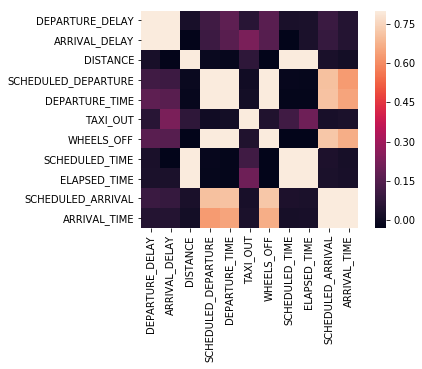

In [66]:
df_short=df[["DEPARTURE_DELAY", "ARRIVAL_DELAY","DISTANCE", "SCHEDULED_DEPARTURE","DEPARTURE_TIME",  "TAXI_OUT", "WHEELS_OFF","SCHEDULED_TIME", "ELAPSED_TIME","SCHEDULED_ARRIVAL","ARRIVAL_TIME"]]
corrmat = df_short.corr()
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

We don't see even modest correlations between the delay variables and taxi, wheels off, distance, departure time and arrival time variables. The unsurprising high correlation between arrival and departure delay confirms that we may only need to analyze one of these variables in depth.

# Comparing different airports

In [58]:
df["ORIGIN_AIRPORT"].count()

5819079

In [67]:
df.groupby(by="ORIGIN_AIRPORT")["ORIGIN_AIRPORT"].count().sort_values().head()  / 5819079 *100

ORIGIN_AIRPORT
11503    0.000069
13502    0.000103
10165    0.000155
14222    0.000155
13541    0.000189
Name: ORIGIN_AIRPORT, dtype: float64

In [65]:
df.groupby(by="ORIGIN_AIRPORT")["ORIGIN_AIRPORT"].count().sort_values().tail()  / 5819079 *100

ORIGIN_AIRPORT
LAX    3.345426
DEN    3.369176
DFW    4.116648
ORD    4.912874
ATL    5.960325
Name: ORIGIN_AIRPORT, dtype: float64

We see that the US airports with the greatest air traffic (passengers),  Atlanta (ATL), Chicago (ORD) and Los angeles (LAX), are in the top 5 for flight cancellations/delays.https://en.wikipedia.org/wiki/List_of_busiest_airports_by_passenger_traffic

# Comparing different airlines

Let's compare different airlines on the number of flight they had in 2015 and their performance

The AIRLINE variable has abbreviations for each airline in the study. To retrieve the full name, we use a second dataset -> airlines.csv

In [27]:
airlines = pd.read_csv("C:/Users/charl/Desktop/airlines.csv")
airlines

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


Now, we merge the two datasets and rename the columns

In [28]:
flights = pd.merge(df, airlines, left_on='AIRLINE', right_on='IATA_CODE', how='left')
flights.drop('IATA_CODE', axis=1, inplace=True)
flights.rename(columns={'AIRLINE_x': 'AIRLINE_ABBR','AIRLINE_y': 'AIRLINE'}, inplace=True)
flights

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE_ABBR,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRLINE
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Alaska Airlines Inc.
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,American Airlines Inc.
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,US Airways Inc.
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,American Airlines Inc.
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Alaska Airlines Inc.
5,2015,1,1,4,DL,806,N3730B,SFO,MSP,25,...,8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Delta Air Lines Inc.
6,2015,1,1,4,NK,612,N635NK,LAS,MSP,25,...,-17.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Spirit Air Lines
7,2015,1,1,4,US,2013,N584UW,LAX,CLT,30,...,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,US Airways Inc.
8,2015,1,1,4,AA,1112,N3LAAA,SFO,DFW,30,...,-13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,American Airlines Inc.
9,2015,1,1,4,DL,1173,N826DN,LAS,ATL,30,...,-15.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Delta Air Lines Inc.


Howmany flights per year per airline (number and percentage) ?

In [38]:
flights.groupby(by='AIRLINE')['AIRLINE'].count().sort_values()

AIRLINE
Virgin America                    61903
Hawaiian Airlines Inc.            76272
Frontier Airlines Inc.            90836
Spirit Air Lines                 117379
Alaska Airlines Inc.             172521
US Airways Inc.                  198715
JetBlue Airways                  267048
American Eagle Airlines Inc.     294632
United Air Lines Inc.            515723
Atlantic Southeast Airlines      571977
Skywest Airlines Inc.            588353
American Airlines Inc.           725984
Delta Air Lines Inc.             875881
Southwest Airlines Co.          1261855
Name: AIRLINE, dtype: int64

In [29]:
flights['AIRLINE'].count()

5819079

In [37]:
flights.groupby(by='AIRLINE')['AIRLINE'].count().sort_values() / 5819079 *100

AIRLINE
Virgin America                   1.063794
Hawaiian Airlines Inc.           1.310723
Frontier Airlines Inc.           1.561003
Spirit Air Lines                 2.017141
Alaska Airlines Inc.             2.964748
US Airways Inc.                  3.414887
JetBlue Airways                  4.589180
American Eagle Airlines Inc.     5.063207
United Air Lines Inc.            8.862622
Atlantic Southeast Airlines      9.829339
Skywest Airlines Inc.           10.110758
American Airlines Inc.          12.475926
Delta Air Lines Inc.            15.051884
Southwest Airlines Co.          21.684789
Name: AIRLINE, dtype: float64

So, "Southwest Airlines Co." has the most number of flights (almost 22% of the total flights) followed by "Delta Air Lines Inc" and "American Airlines Inc".

Next, we want to check the performance of each airline based on cancellation, arrival and departure delays.

##### Airlines performance based on their mean arrival delay:

In [36]:
flights.groupby(by='AIRLINE') ['ARRIVAL_DELAY'].mean().sort_values()

AIRLINE
Alaska Airlines Inc.            -0.976563
Delta Air Lines Inc.             0.186754
Hawaiian Airlines Inc.           2.023093
American Airlines Inc.           3.451372
US Airways Inc.                  3.706209
Southwest Airlines Co.           4.374964
Virgin America                   4.737706
United Air Lines Inc.            5.431594
Skywest Airlines Inc.            5.845652
American Eagle Airlines Inc.     6.457873
Atlantic Southeast Airlines      6.585379
JetBlue Airways                  6.677861
Frontier Airlines Inc.          12.504706
Spirit Air Lines                14.471800
Name: ARRIVAL_DELAY, dtype: float64

So it seems that most of the airlines have some sort of delay.  "Spirit Air Lines" and "Frontier Airlines" have the highest minutes of arrival delay on average. On the other hand, "Alaska Airlines" perform very well and they almost reach tehir destinations on time

In [47]:
mean_arrival_delays = flights.groupby(by='AIRLINE') ['ARRIVAL_DELAY'].mean().sort_values()
mean_arrival_delays

AIRLINE
Alaska Airlines Inc.            -0.976563
Delta Air Lines Inc.             0.186754
Hawaiian Airlines Inc.           2.023093
American Airlines Inc.           3.451372
US Airways Inc.                  3.706209
Southwest Airlines Co.           4.374964
Virgin America                   4.737706
United Air Lines Inc.            5.431594
Skywest Airlines Inc.            5.845652
American Eagle Airlines Inc.     6.457873
Atlantic Southeast Airlines      6.585379
JetBlue Airways                  6.677861
Frontier Airlines Inc.          12.504706
Spirit Air Lines                14.471800
Name: ARRIVAL_DELAY, dtype: float64

Looking at box plots we identify the distributions of arrival delays for each airline (below). We see that though Spirit Air Lines has the highest mean arrival delay(14.47), American Airlines with mean 3.45, has some very long arrival delays. 

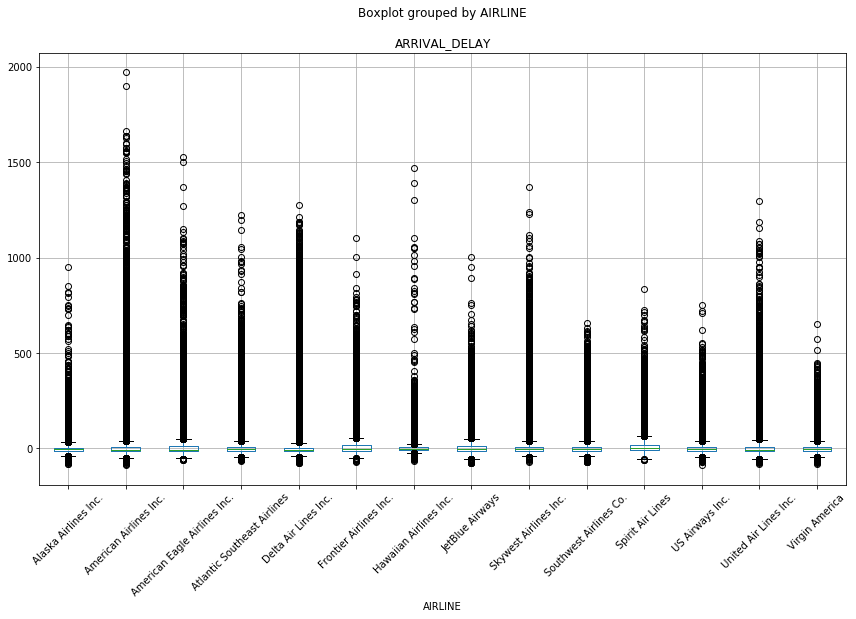

In [44]:
flights[["AIRLINE","ARRIVAL_DELAY"]].boxplot(column = "ARRIVAL_DELAY",by="AIRLINE",figsize=(14,8),rot=45)


##### Airlines performance based on their mean departure delay:

In [48]:
flights.groupby(by='AIRLINE') ['DEPARTURE_DELAY'].mean().sort_values()

AIRLINE
Hawaiian Airlines Inc.           0.485713
Alaska Airlines Inc.             1.785801
US Airways Inc.                  6.141137
Delta Air Lines Inc.             7.369254
Skywest Airlines Inc.            7.801104
Atlantic Southeast Airlines      8.715934
American Airlines Inc.           8.900856
Virgin America                   9.022595
American Eagle Airlines Inc.    10.125188
Southwest Airlines Co.          10.581986
JetBlue Airways                 11.514353
Frontier Airlines Inc.          13.350858
United Air Lines Inc.           14.435441
Spirit Air Lines                15.944766
Name: DEPARTURE_DELAY, dtype: float64

Let's put arrival and departure delay next to each other for better comparision:

In [53]:
df_delay = pd.DataFrame(flights.groupby('AIRLINE')[['ARRIVAL_DELAY','DEPARTURE_DELAY']].mean())
df_delay

,ARRIVAL_DELAY,DEPARTURE_DELAY
AIRLINE,,
Alaska Airlines Inc.,-0.976563,1.785801
American Airlines Inc.,3.451372,8.900856
American Eagle Airlines Inc.,6.457873,10.125188
Atlantic Southeast Airlines,6.585379,8.715934
Delta Air Lines Inc.,0.186754,7.369254
Frontier Airlines Inc.,12.504706,13.350858
Hawaiian Airlines Inc.,2.023093,0.485713
JetBlue Airways,6.677861,11.514353
Skywest Airlines Inc.,5.845652,7.801104


In [ ]:
flights[["AIRLINE","ARRIVAL_DELAY"]].boxplot(column = "ARRIVAL_DELAY",by="AIRLINE",figsize=(14,8),rot=45)

Again, most flights have departure delays; with "Spirit Air lines" having the highest delay. "Alaska Airlines" and " Hawaiian Airlines" almost leave on-time.

One thing that comes to mind is that wethere or not the average flight speed is different between different airlines. This may contribute to the performance of each airline

In [39]:
flights['FLIGHT_SPEED'] = 60*flights['DISTANCE']/flights['AIR_TIME']
x = flights.groupby('AIRLINE')['FLIGHT_SPEED'].mean().sort_values()
x

AIRLINE
Hawaiian Airlines Inc.          343.748564
American Eagle Airlines Inc.    360.899443
Atlantic Southeast Airlines     364.683738
Skywest Airlines Inc.           368.598815
US Airways Inc.                 411.108496
Southwest Airlines Co.          415.197481
Delta Air Lines Inc.            419.433004
JetBlue Airways                 419.569835
American Airlines Inc.          427.679334
Virgin America                  435.403337
Alaska Airlines Inc.            435.510696
Spirit Air Lines                436.499865
Frontier Airlines Inc.          441.259284
United Air Lines Inc.           446.753151
Name: FLIGHT_SPEED, dtype: float64

Most of the flights are within the same speed range (400 to 450 miles/hour). How about the distribution of the flight speed per airline?

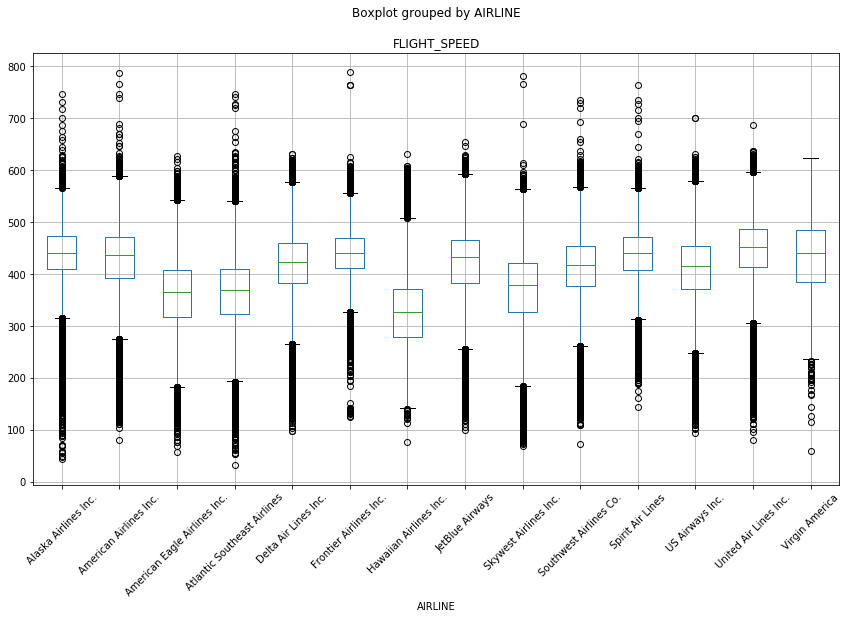

In [27]:
flights[['AIRLINE','FLIGHT_SPEED']].boxplot(column = 'FLIGHT_SPEED',by='AIRLINE',figsize=(14,8),rot=45)

So again, as better seen in the graph, Hawaiian Airlines has the slowest flight speed. There is also quite a variation in the speed even within the same company. That may reflect the differences on the type of aircrafts that were used; some could go up as high as 800 miles/h and some are as low as 50 miles/h.

### What is the most common reason for arrival delays?

Let's cacluclate the total amount of delay time for flights that are categorized as delayed (arrival delay >=15 min):

In [28]:
print (flights['ARRIVAL_DELAY'][df['ARRIVAL_DELAY']>=15].sum())

62651867.0


So there is more than 1 million hour delay in total in 2015 for flights that are categorized as delayed (we are interested only in these flights as they are the ones that are provided with a reason for delay). We are interested to know what is the most common reason for the delays.

In [29]:
print ((flights['WEATHER_DELAY'].sum()/62651867 * 100).round())

5.0


In [30]:
print ((flights['AIR_SYSTEM_DELAY'].sum()/62651867 * 100).round())

23.0


In [31]:
print ((flights['SECURITY_DELAY'].sum()/62651867 * 100).round())

0.0


In [32]:
print ((flights['AIRLINE_DELAY'].sum()/62651867 * 100).round())

32.0


In [33]:
print ((flights['LATE_AIRCRAFT_DELAY'].sum()/62651867 * 100).round())

40.0


The above analysis indicates that the most contrubiting factor for the total amount of time delayed is "late_aircraft delay" (40% of the total delay time) followed by "airline_delay" (32%), "air system_delay" (23%) and "weather_delay (5%). There is no delay related to security. This shows that most of the delays are related to aircraft/airline companies and much less to airport/weather. 

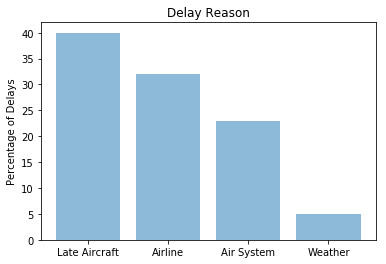

In [56]:
objects = ('Late Aircraft', 'Airline', 'Air System', 'Weather')
y_pos = np.arange(len(objects))
performance = [40, 32,23,5]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel("Percentage of Delays")
plt.title("Delay Reason")
 
plt.show()

In [36]:
flights.groupby(by='AIRLINE') ['AIRLINE_DELAY'].mean()

AIRLINE
Alaska Airlines Inc.            15.543352
American Airlines Inc.          21.139201
American Eagle Airlines Inc.    17.425025
Atlantic Southeast Airlines     21.651277
Delta Air Lines Inc.            22.941028
Frontier Airlines Inc.          14.719983
Hawaiian Airlines Inc.          22.792063
JetBlue Airways                 18.150503
Skywest Airlines Inc.           18.959163
Southwest Airlines Co.          16.191674
Spirit Air Lines                13.766839
US Airways Inc.                 17.410107
United Air Lines Inc.           21.144678
Virgin America                  11.097809
Name: AIRLINE_DELAY, dtype: float64

In [37]:
flights.groupby(by='AIRLINE') ['LATE_AIRCRAFT_DELAY'].mean()

AIRLINE
Alaska Airlines Inc.            17.064111
American Airlines Inc.          21.747956
American Eagle Airlines Inc.    23.404512
Atlantic Southeast Airlines     24.078400
Delta Air Lines Inc.            18.099252
Frontier Airlines Inc.          26.900255
Hawaiian Airlines Inc.          14.701671
JetBlue Airways                 23.954305
Skywest Airlines Inc.           26.612403
Southwest Airlines Co.          26.681590
Spirit Air Lines                20.490868
US Airways Inc.                 14.311199
United Air Lines Inc.           26.019098
Virgin America                  21.693751
Name: LATE_AIRCRAFT_DELAY, dtype: float64

##### Airlines performance based on cancellation rate (n and %):

In [41]:
flights.groupby(by='AIRLINE') ['CANCELLED'].sum()

AIRLINE
Alaska Airlines Inc.              669
American Airlines Inc.          10919
American Eagle Airlines Inc.    15025
Atlantic Southeast Airlines     15231
Delta Air Lines Inc.             3824
Frontier Airlines Inc.            588
Hawaiian Airlines Inc.            171
JetBlue Airways                  4276
Skywest Airlines Inc.            9960
Southwest Airlines Co.          16043
Spirit Air Lines                 2004
US Airways Inc.                  4067
United Air Lines Inc.            6573
Virgin America                    534
Name: CANCELLED, dtype: int64

In [42]:
flights.groupby(by='AIRLINE') ['CANCELLED'].mean()*100

AIRLINE
Alaska Airlines Inc.            0.387779
American Airlines Inc.          1.504028
American Eagle Airlines Inc.    5.099582
Atlantic Southeast Airlines     2.662869
Delta Air Lines Inc.            0.436589
Frontier Airlines Inc.          0.647320
Hawaiian Airlines Inc.          0.224198
JetBlue Airways                 1.601210
Skywest Airlines Inc.           1.692861
Southwest Airlines Co.          1.271382
Spirit Air Lines                1.707290
US Airways Inc.                 2.046650
United Air Lines Inc.           1.274521
Virgin America                  0.862640
Name: CANCELLED, dtype: float64

This shows that more than 5% of "American Eagle Airlines" flights got cancelled which is A LOT! In contrast, only 0.2% of "Hawaiian Airlines" and 0.38% of "Alaska Airlines" flights were cancelled in 2015.

### What is the most common reason for flight cancellation?

In [43]:
flights.groupby(by='CANCELLATION_REASON') ['CANCELLATION_REASON'].count()

CANCELLATION_REASON
A    25262
B    48851
C    15749
D       22
Name: CANCELLATION_REASON, dtype: int64

The result shows that most of the cancellations are due weather condition (B=48851) following with faults with Airline/Carrier (A=25262) and National Air System (C=15749). Only 22 flights were cancelled due to security reason.
The other interesting point is that weather has MUCH more impact on the flight cancellations rather than delays (5% effect on total delay time versus almost 60% on cancellation). In other word, wethear conditions would most likely cancel the flight rather than delaying its arrival. Below is the breakdown of reasons for cancellation per airline.

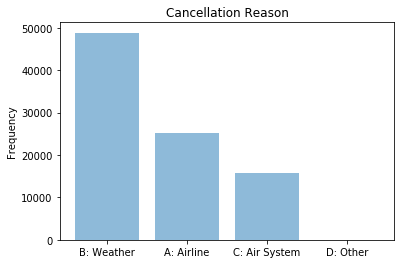

In [55]:
objects = ('B: Weather', 'A: Airline', 'C: Air System', 'D: Other')
y_pos = np.arange(len(objects))
performance = [48851, 25262,15749,22]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel("Frequency")
plt.title("Cancellation Reason")
 
plt.show()

In [46]:
flights.groupby(by=['AIRLINE', 'CANCELLATION_REASON']) ['CANCELLATION_REASON'].count()

AIRLINE                       CANCELLATION_REASON
Alaska Airlines Inc.          A                       334
                              B                       317
                              C                        18
American Airlines Inc.        A                      2879
                              B                      7306
                              C                       730
                              D                         4
American Eagle Airlines Inc.  A                      2475
                              B                      9164
                              C                      3385
                              D                         1
Atlantic Southeast Airlines   A                      3604
                              B                      5082
                              C                      6544
                              D                         1
Delta Air Lines Inc.          A                       594
                      

### Business Q&A

##### With air traffic congestion and weather events set, are we able to adequately evaluate individual airline performance?

Yes. Air traffic congestion, severe weather and security events are all something experienced by national carriers, and are considered outside the airlines’ control. However, by comparing on-time arrivals, departures and the amount of cancelled flights, we’re able to evaluate the differences between carriers.  These differences will be valuable in predicting which airlines have the best on-time flight performance and likelihood of cancellations, and will allow us to make accurate suggestions to users of our application.  This information can then be compared against current seat prices, to find the best value for cost-conscious travellers.

##### Is there a significant difference between national carriers?

Yes. Our analysis showed a wide gap between performances, with Alaska Airlines having the most on-time arrivals, second best on-time departures and second least amount of cancelled flights in the group.  On the other end of the scale was Frontier Airlines and Spirit Airlines. They were bottom of the pack in both arrivals and departures, and Spirit Airline’s cancelled flights were in the bottom quarter of all airlines.

##### What percentage of delays/cancellations are due to airlines versus weather or air traffic congestion? Is it significant?

According to our analysis, the biggest contributing factors for delays are "late_aircraft delay" (40% of the total delay time) followed by "airline_delay" (32%), "air system_delay" (23%) and "weather_delay (5%). There is no significant delay related to security. For cancellations, weather is the biggest driver, followed by Airline issues.

##### Do flight speeds impact on-time arrivals?

Most airlines fly at similar speeds (400-450 miles/h), and it seems that there is not any strong correlation between speed and on-time performance. Hawaiian Airlines has the slowest speed in the group, but has the third best arrivals times. However, this may mean that Hawaiian Airlines is just better at estimating their arrival time. To better answer this question, we should compare the time it took for different airlines to travel the same route. Maybe Hawaiian Airlines just have longer flight time compare to other airlines. We will try to answer this question precisely as the project progresses. 

##### Can we predict which airline will have the greatest chance of an on-time departure? 

Based on past performance, we feel confident that future performance can be accurately predicted. The airlines with the greatest chance of an on-time departure are Hawaiian Airlines (mean score of 0.48) and Alaska Airlines (1.78). 

##### Can we predict which airlines will have the greatest chance of an on-time arrival? what about cancellations?

Based on past performance, we feel confident that future performance can be accurately predicted . The airlines with the greatest chance of an on-time arrival are Alaska Airlines (-0.97), Delta Airlines (0.18), and Hawaiian Airlines (2.02).
As for the cancellations, more than 5% of "American Eagle Airlines" flights got cancelled! In contrast, only 0.2% of Hawaiian Airlines and 0.38% of Alaska Airlines flights were cancelled in 2015